<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Graphical_Representations_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphical Representations of Data**

Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

In [0]:
#mount google drive to Google colab 

from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install quandl

In [3]:
# Import our libraries

# This is for numerical processing

import pandas as pd
import quandl
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'xx8w-rWbjyXpygy-PN5m'   #create an account with Quandl and insert your api key here, otherwise you are limited to only 50 data calls per day

data = quandl.get(["WIKI/MSFT.11", 'WIKI/AAPL.11'], start_date='2012-1-1', end_date='2015-6-1')
data.head(2)


,WIKI/MSFT - Adj. Close,WIKI/AAPL - Adj. Close
Date,,
2012-01-03,22.792249,52.848787
2012-01-04,23.332995,53.132802


In [4]:
#renaming columns

data.columns = ('MSFT', 'AAPL')

data.head()

,MSFT,AAPL
Date,,
2012-01-03,22.792249,52.848787
2012-01-04,23.332995,53.132802
2012-01-05,23.571435,53.722681
2012-01-06,23.933352,54.284287
2012-01-09,23.622529,54.198183


In [5]:
data['MSFT'].head()

Date
2012-01-03    22.792249
2012-01-04    23.332995
2012-01-05    23.571435
2012-01-06    23.933352
2012-01-09    23.622529
Name: MSFT, dtype: float64

## **Histogram**

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Propoability Density Function (PDF).

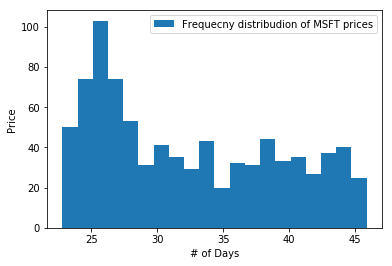

In [6]:
#Plot a histogram using 20 bins

plt.hist(data['MSFT'], bins = 20)
plt.ylabel('Price')
plt.xlabel('# of Days')
plt.legend(['Frequecny distribudion of MSFT prices'])

## **Returns Histogram**

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot.

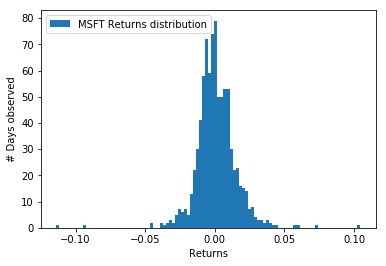

In [7]:
# Remove the first element because percent change from nothing to something is NaN
R = data.pct_change()[1:]

# Plot a histogram using 100 bins
plt.hist(R['MSFT'], bins = 100)
plt.ylabel('# Days observed')
plt.xlabel('Returns')
plt.legend(['MSFT Returns distribution'])

## **Cumulative Histogram (Discrete Estimated CDF)**

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

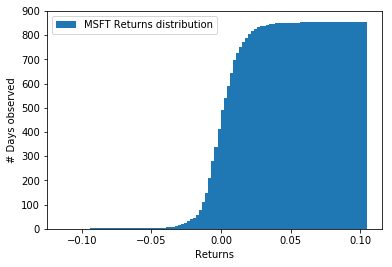

In [8]:
# Remove the first element because percent change from nothing to something is NaN
R = data.pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R['MSFT'], bins = 100, cumulative = True)
plt.ylabel('# Days observed')
plt.xlabel('Returns')
plt.legend(['MSFT Returns distribution'])

## **Scatter plot**

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

Text(0.5, 1.0, 'Daily Prices')

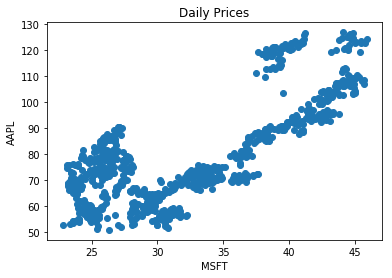

In [9]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices')

Text(0.5, 1.0, 'Daily Returns')

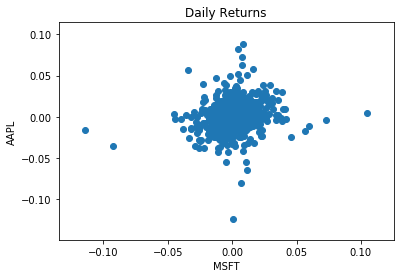

In [10]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns')

## **Line graph**

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


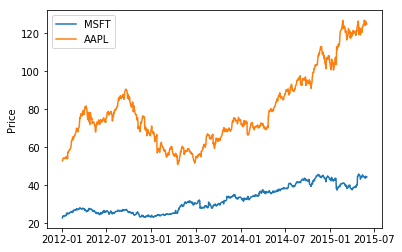

In [11]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL'])

Text(0.5, 1.0, 'MSFT Returns')

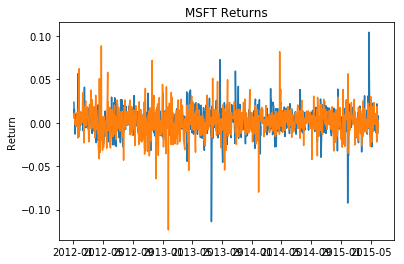

In [12]:
# Remove the first element because percent change from nothing to something is NaN
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.plot(R_msft)
plt.plot(R_aapl)
plt.ylabel('Return')
plt.title('MSFT Returns')